<a href="https://colab.research.google.com/github/tom2rd/Googlecolabutils/blob/master/Electromagnetics/ElectromagneticPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Electromagnetic Python
https://github.com/lbolla/EMpy

電磁気学で広く使用されている数値アルゴリズムのスイートです。

パッケージに含まれるもの：

* 等方性および異方性の転送行列アルゴリズム。
* 等方性および異方性の厳密な結合波解析（RCWA）アルゴリズム。
* よく知られているさまざまなデバイス（マッハツェンダー、リング共振器など）の周波数応答の数値モデル。
* このリストは、非常に短いものですが、FDTDと、電磁気学で使用される多くの非常に優れたソフトウェアへのインターフェイスを含むように拡大されることを期待しています。




例
ソースコードには、より多くの（そしてより最新の）例が用意されています。

EMpyの機能の簡単な例をいくつか示します。できるだけ早くより多くが来るでしょう。せっかちな人 は、配布元の例を見ることができます 。

* 単層反射防止コーティング
* 異方性多層
* シングルリングレゾネーター
* Nリング共振器
* 有限差分完全ベクトルモードソルバー
* 格子付き多層


In [0]:
!pip install ElectromagneticPython

     |████████████████████████████████| 92kB 4.1MB/s 
  Created wheel for ElectromagneticPython: filename=ElectroMagneticPython-2.0.0-cp36-none-any.whl size=68607 sha256=7c5f1ae2470c06dcf6449b138c332e7ada0219a57d83776e2a99c5af67adeed7
  Stored in directory: /root/.cache/pip/wheels/39/bf/58/7aa75a00e1c877fdb7d7a39e63cfd141ec4d0e72090cc15c79
Successfully built ElectromagneticPython


In [0]:
pip install scikits.bvp1lg

     |████████████████████████████████| 51kB 2.5MB/s 
  Created wheel for scikits.bvp1lg: filename=scikits.bvp1lg-0.2.9-cp36-cp36m-linux_x86_64.whl size=435156 sha256=764c6008558b54665f92150be3fafdc628842f9ad5a158d720c8b60182a71265
  Stored in directory: /root/.cache/pip/wheels/af/29/9a/b3ec2f69149f95d32205fb8f45df38e6e8a88100f74495275b
Successfully built scikits.bvp1lg


In [0]:
%cd sample_data/
!ls

/content/sample_data
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


/usr/local/lib/python3.6/dist-packages/EMpy/RCWA.py:741: LinAlgWarning: Ill-conditioned matrix (rcond=9.20981e-17): result may not be accurate.
  x = linsolve(BC_A, BC_b)
/usr/local/lib/python3.6/dist-packages/EMpy/RCWA.py:741: LinAlgWarning: Ill-conditioned matrix (rcond=2.68697e-18): result may not be accurate.
  x = linsolve(BC_A, BC_b)
/usr/local/lib/python3.6/dist-packages/EMpy/RCWA.py:741: LinAlgWarning: Ill-conditioned matrix (rcond=9.24227e-17): result may not be accurate.
  x = linsolve(BC_A, BC_b)
/usr/local/lib/python3.6/dist-packages/EMpy/RCWA.py:741: LinAlgWarning: Ill-conditioned matrix (rcond=9.76942e-17): result may not be accurate.
  x = linsolve(BC_A, BC_b)
/usr/local/lib/python3.6/dist-packages/EMpy/RCWA.py:741: LinAlgWarning: Ill-conditioned matrix (rcond=2.84993e-17): result may not be accurate.
  x = linsolve(BC_A, BC_b)
/usr/local/lib/python3.6/dist-packages/EMpy/RCWA.py:741: LinAlgWarning: Ill-conditioned matrix (rcond=4.44899e-17): result may not be accurate.
 

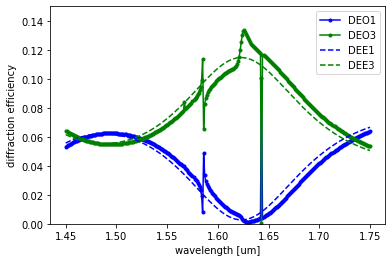

In [0]:
"""Rigorous Coupled Wave Analysis example."""

import numpy
import pylab

import EMpy
from EMpy.materials import (
    IsotropicMaterial, AnisotropicMaterial, RefractiveIndex, EpsilonTensor)


alpha = 0.
delta = 0.
# psi = EMpy.utils.deg2rad(0.)  # TM
# psi = EMpy.utils.deg2rad(90.)  # TE
psi = EMpy.utils.deg2rad(70.)  # hybrid
phi = EMpy.utils.deg2rad(90.)

LAMBDA = 1016e-9  # grating periodicity
n = 2  # orders of diffraction

UV6 = IsotropicMaterial(
    'UV6',
    n0=RefractiveIndex(n0_const=1.560))
SiN = AnisotropicMaterial(
    'SiN',
    epsilon_tensor=EpsilonTensor(
        epsilon_tensor_const=EMpy.constants.eps0 * EMpy.utils.euler_rotate(
            numpy.diag(numpy.asarray([1.8550, 1.8750, 1.9130]) ** 2),
            EMpy.utils.deg2rad(14),
            EMpy.utils.deg2rad(25),
            EMpy.utils.deg2rad(32))))
BPTEOS = IsotropicMaterial(
    'BPTEOS',
    n0=RefractiveIndex(n0_const=1.448))
ARC1 = IsotropicMaterial(
    'ARC1', n0=RefractiveIndex(n0_const=1.448))

EFF = IsotropicMaterial(
    'EFF', n0=RefractiveIndex(n0_const=1.6))

multilayer1 = EMpy.utils.Multilayer([
    EMpy.utils.Layer(EMpy.materials.Air, numpy.inf),
    EMpy.utils.Layer(SiN, 226e-9),
    EMpy.utils.Layer(BPTEOS, 226e-9),
    EMpy.utils.BinaryGrating(SiN, BPTEOS, .659, LAMBDA, 123e-9),
    EMpy.utils.Layer(SiN, 219e-9),
    EMpy.utils.Layer(EMpy.materials.SiO2, 2188e-9),
    EMpy.utils.Layer(EMpy.materials.Si, numpy.inf),
])

multilayer2 = EMpy.utils.Multilayer([
    EMpy.utils.Layer(EMpy.materials.Air, numpy.inf),
    EMpy.utils.Layer(SiN, 226e-9),
    EMpy.utils.Layer(BPTEOS, 226e-9),
    EMpy.utils.Layer(
        IsotropicMaterial(n0=RefractiveIndex(n0_const=1.6)), 123e-9),
    EMpy.utils.Layer(SiN, 219e-9),
    EMpy.utils.Layer(EMpy.materials.SiO2, 2188e-9),
    EMpy.utils.Layer(EMpy.materials.Si, numpy.inf),
])

wls = numpy.linspace(1.45e-6, 1.75e-6, 301)

solution1 = EMpy.RCWA.AnisotropicRCWA(
    multilayer1, alpha, delta, psi, phi, n).solve(wls)
solution2 = EMpy.RCWA.AnisotropicRCWA(
    multilayer2, alpha, delta, psi, phi, n).solve(wls)

um = 1e-6
pylab.plot(
    # wls / um, solution1.DEO1[n, :], 'k.-',
    # wls / um, solution1.DEO3[n, :], 'r.-',
    wls / um, solution1.DEE1[n, :], 'b.-',
    wls / um, solution1.DEE3[n, :], 'g.-',
    # wls / um, solution2.DEO1[n, :], 'k--',
    # wls / um, solution2.DEO3[n, :], 'r--',
    wls / um, solution2.DEE1[n, :], 'b--',
    wls / um, solution2.DEE3[n, :], 'g--',
)
pylab.xlabel('wavelength [um]')
pylab.ylabel('diffraction efficiency')
pylab.legend(('DEO1', 'DEO3', 'DEE1', 'DEE3'))
pylab.axis('tight')
pylab.ylim([0, 0.15])
pylab.show()